En los trabajos practicos anteriores pude entender y limpiar el set de datos para obtener informacion de el, pude notar que al dividir los siniestros por tipo puedo sacar conclusiones mas detalladas sobre las medidas que habria que tomar por zona para mejorar los problemas viales, como por ejemplo, si tengo muchos accidentes de bicicleta en cierta calle, se deberia poner carteles alertendo a los ciclistas o encarar un proyecto para hacer una bicisenda en caso de ser posible. Tambien pude notar que en ciertos meses hay menor cantidad de siniestros, estos son los meses 1 y 2 y son vacaciones, hay mucha menos gente en capital federal, con lo cual puedo preguntarme que porcentaje de siniestros en vacaciones son causados por peatones y comparar este numero con el porcentaje de siniestros causados por peatones en los otros meses. 

Al discriminar por sexo pude notar que hay muchos mas accidentes de motos de hombres que de mujeres, pero esto puede deberse a que hay muchos mas hombres que mujeres manejando una moto. Continuando con esta linea, pasa algo parecido con los autos (aunque no hay tanta diferencia), pero al ver que en los siniestros de peatones hay casi un 50/50 de hombres y mujeres, tiendo a pensar que la diferencia que estoy viendo en cantidad de accidentes es por haber una gran diferencia en la cantidad de conductores entre un sexo y el otro.

Un grafico interesante parece ser el de los tipos de choque por comuna. Puedo ver que en la comuna 3 hay casi la misma cantidad de choques con motos, peatones y multiples, pero en otras comunas estas cantidades varian mucho mas, tendré que seguir explorando y graficando para ver si las comunas sin una buena division para este tipo de estudio (o si es mejor discriminar por calles o clusterisar para conseguir zonas con problemas puntuales)

TENIENDO EN CUENTA LA EXPLORACION INICIAL Y POSTERIOR REALIZACION DE VISUALIZACIONES, VOY A HACER HIPOTESIS Y PREGUNTAS DE INTERES SOBRE ESTE DATASET.

1. ¿en que comunas hay mas accidentes de bicicleta?
2. ¿son una buena division las comunas para este problema? 
3. ¿que edades son las que registran mas accidentes en bicicleta?
4. ¿hay algun lugar en el que sea muy peligroso andar en moto?
5. ¿que lugares de capital son los que tienen mas siniestros en vacaciones de verano?
6. ¿cuales son las calles (no avenidas) con mas siniestros? 

In [4]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import seaborn as sns

In [5]:
siniestros = 'victimas-siniestros.csv'
sin_df = pd.read_csv(siniestros)

OSError: [Errno 22] Invalid argument: 'victimas-siniestros.csv'

In [ ]:
sin_df['comuna'].fillna(0,inplace=True)
sin_df['comuna'] = sin_df['comuna'].astype(int)

In [ ]:
sin_df['tipo_colision1'].fillna('sin_data',inplace=True)
sin_df['tipo'].fillna('sin_data',inplace=True)

In [ ]:
bicis = sin_df.loc[(sin_df['tipo_colision1'].str.contains('bici'))|(sin_df['tipo'].str.contains('bici'))]
motos = sin_df.loc[(sin_df['tipo_colision1'].str.contains('moto'))|(sin_df['tipo'].str.contains('moto'))]
peaton = sin_df.loc[(sin_df['tipo_colision1'].str.contains('peaton'))|(sin_df['tipo'].str.contains('peaton'))]

In [419]:
bicis['cant'] = 1
bicis_comuna = bicis.groupby('comuna')['cant'].sum().reset_index()
bicis_comuna = bicis_comuna.loc[bicis_comuna['comuna']!=0]

C:\Users\Sistemas\AppData\Local\Temp\ipykernel_22796\467129167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicis['cant'] = 1


Text(0, 0.5, 'Cantidad de siniestros')

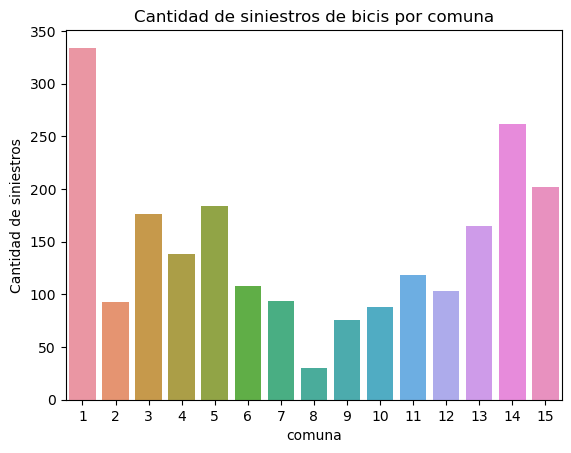

In [420]:
ax = sns.barplot(data=bicis_comuna, x='comuna', y='cant')
ax.set_title('Cantidad de siniestros de bicis por comuna')
ax.set_xlabel('comuna')
ax.set_ylabel('Cantidad de siniestros')

EN RESPUESTA A LA 1er PREGUNTA, LAS COMUNAS CON MAS SINIESTROS DE BICICLETAS SON LAS COMUNAS 1, 14 y 15... MIENTRAS QUE LA COMUNA 8 ES LA QUE TIENE MENOR CANTIDAD DE SINIESTROS

Text(0, 0.5, 'y')

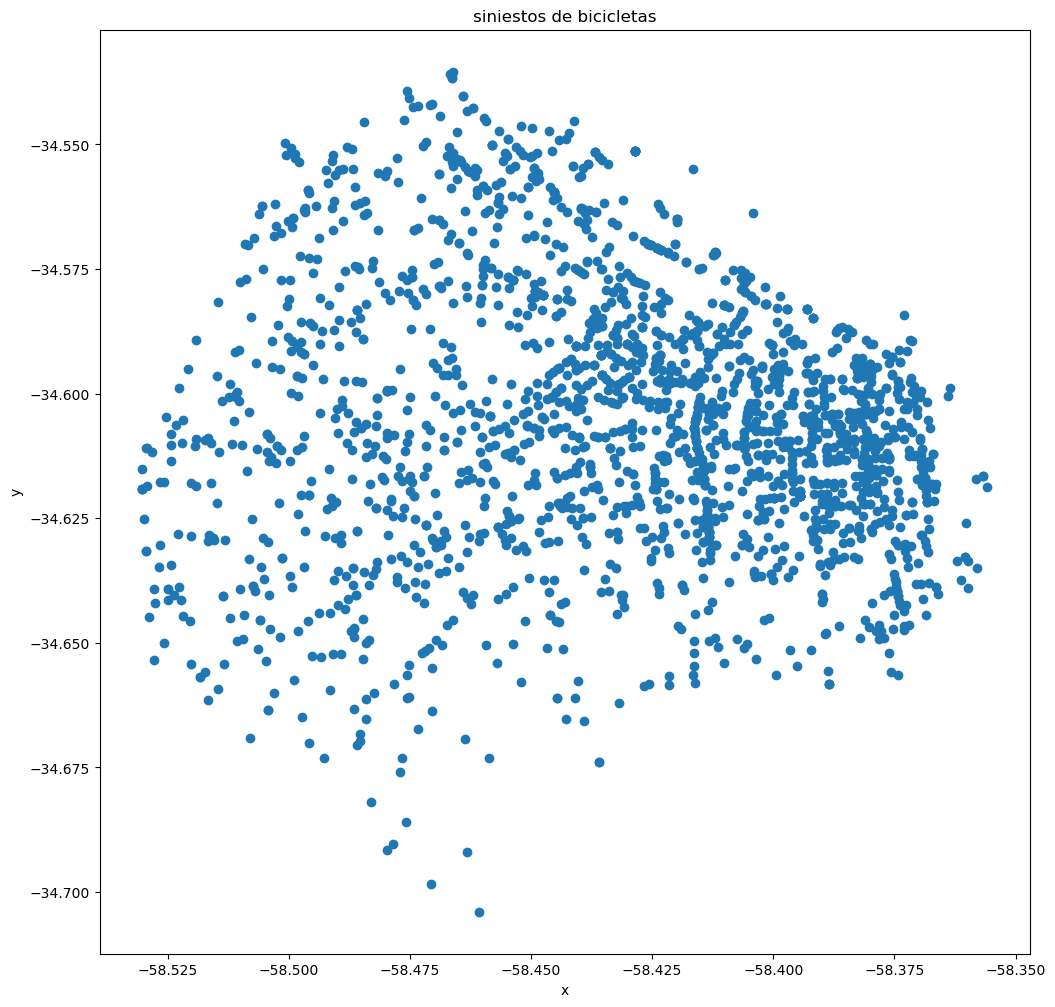

In [421]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(bicis['x'],bicis['y'])
ax.set_title('siniestos de bicicletas')
ax.set_xlabel('x')
ax.set_ylabel('y')

EN RESPUESTA A LA 2da PREGUNTA, LAS COMUNAS NO PARECEN SER LA MEJOR DIVISION POSIBLE, CAPAZ LO MEJOR SERIA DISCRIMINAR POR CALLES... IGUALMENTE SIRVE LA DIVISION COMUNAL YA QUE PODEMOS VER QUE EN ALGUNAS COMUNAS HAY MUCHOS MAS ACCIDENTES QUE EN OTRAS

In [422]:
calles_peligrosas = bicis.value_counts('calle1')
calles_peligrosas2 = bicis.value_counts('calle2')

In [423]:
c_pel = calles_peligrosas[calles_peligrosas>5].to_frame().reset_index()
c_pel2 = calles_peligrosas2[calles_peligrosas2>5].to_frame().reset_index()

In [424]:
calles_pel = c_pel.merge(c_pel2,right_on='calle2',left_on='calle1',how='inner')
calles_pel['total'] = calles_pel['0_x'] + calles_pel['0_y']
calles_pel = calles_pel[['calle1','total']]

In [425]:
calles_pel = calles_pel.head(10)

Text(0.5, 1.0, 'calles con mas siniestros de BICICLETAS')

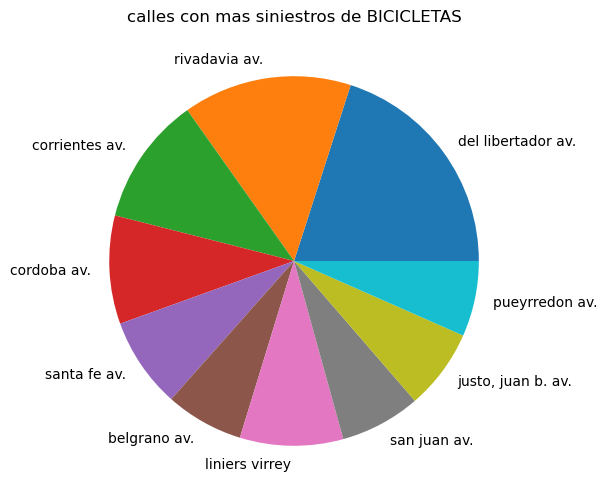

In [426]:
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(x=calles_pel['total'],labels=calles_pel['calle1'])
ax.set_title('calles con mas siniestros de BICICLETAS')

OBVIAMENTE NO HAY QUE OLVIDAR LA CAUSALIDAD; EN ESTAS CALLES SON LAS QUE PASAN MAS BICICLETAS, POR ENDE SON LAS QUE MAS SINIESTROS REPORTAN... SIN EMBARGO, AL SER LAS CALLES CON MAS SINIESTROS ES DONDE MAS HAY QUE INVERTIR (EN BICISENDAS U OTRAS MEDIDAS) PARA BAJAR LA CANTIDAD DE ACCIDENTES


ALGO QUE PUEDO NOTAR COMPARANDO EL SCATTER PLOT CON EL PIECHART ES QUE EN EL SCATTER PLOT PARECE HABER MUCHOS SINIESTROS EN LA AVENIDA 9 DE JULIO, SIN EMBARGO ESTA NO APARECE ENTRE LAS 10 CALLES CON MAS ACCIDENTES; ES POSIBLE QUE LA CAUSA SEA SU CORTO TRAYECTO EN COMPARACION A LAS OTRAS AVENIDAS

PARA RESPONDER LA 4ta PREGUNTA, GRAFICO LOS SINIESTROS POR EDAD Y NOTO QUE ENTRE LOS 25 Y 30 AÑOS SE REGISTRA LA MAYOR CANTIDAD DE SINIESTROS

In [440]:
bicis_edad = bicis.value_counts('edad').head(50).reset_index().rename(columns={0:'cant'}).sort_values(by='edad')

In [441]:
bicis_edad = bicis.groupby(['edad','sexo'])['cant'].sum().reset_index()
bicis_edad.sort_values(by='cant',ascending=False,inplace=True)
bicis_edad = bicis_edad

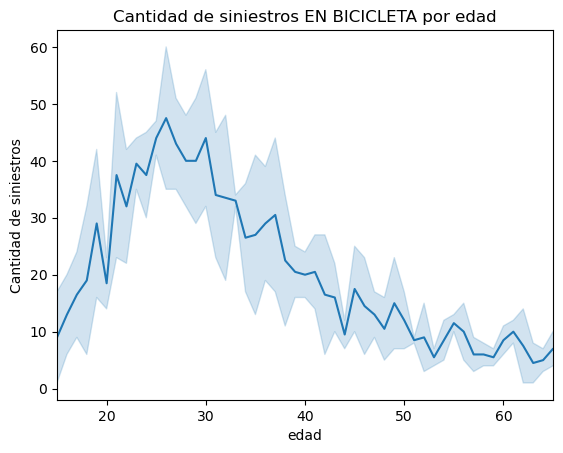

In [442]:
ax = sns.lineplot(data=bicis_edad, x='edad', y='cant')
ax.set_title('Cantidad de siniestros EN BICICLETA por edad')
ax.set_xlabel('edad')
ax.set_ylabel('Cantidad de siniestros')
ax.set_xbound(lower=15,upper=65)

AHORA VOY A VER LA PREGUNTA 4, DONDE ES MAS PELIGROSO USAR MOTO? 

In [443]:
motos['cant'] = 1
motos_comuna = motos.groupby('comuna')['cant'].sum().reset_index()
motos_comuna = motos_comuna.loc[motos_comuna['comuna']!=0]

C:\Users\Sistemas\AppData\Local\Temp\ipykernel_22796\383713741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motos['cant'] = 1


Text(0, 0.5, 'Cantidad de siniestros')

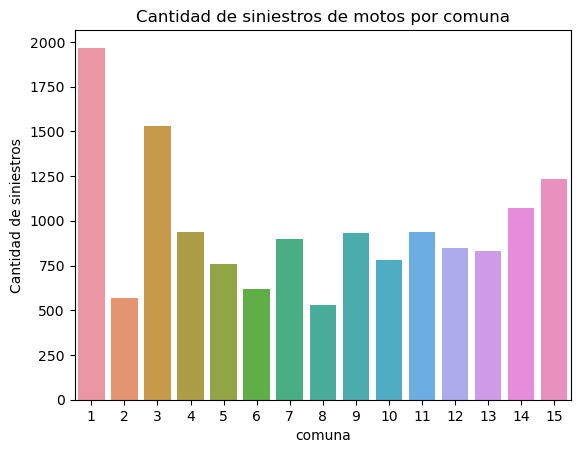

In [444]:
ax = sns.barplot(data=motos_comuna, x='comuna', y='cant')
ax.set_title('Cantidad de siniestros de motos por comuna')
ax.set_xlabel('comuna')
ax.set_ylabel('Cantidad de siniestros')

VEO QUE EL GRAFICO DE LAS MOTOS ES MUY SIMILAR AL GRAFICO DE LAS BICIS, CON LO CUAL ENTIENDO QUE LA INFORMACION QUE BRINDA ESTE GRAFICO NO SERIA DE MUCHO VALOR; IGUALMENTE, SE PUEDE APRECIAR QUE EN LA COMUNA 14 HAY MENOS CANTIDAD DE ACCIDENTES DE MOTO COMPARADO EN PROPORCION CON LOS ACCIDENTES DE LAS BICICLETAS (ya que en el grafico de las bicicletas, la comuna 14 estaba en 2do lugar y en este caso esta en 4to lugar)

LA 1er y 3er COMUNA SON LAS QUE REGISTRAN MAS ACCIDENTES

VEO A CONTINUACION LA 5ta PREGUNTA, LOS SINIESTROS EN PERIODO DE VACACIONES DE VERANO (enero y febrero)

In [445]:
vacaciones = sin_df.loc[(sin_df['mes']==1) | (sin_df['mes']==2)]

Text(0, 0.5, 'y')

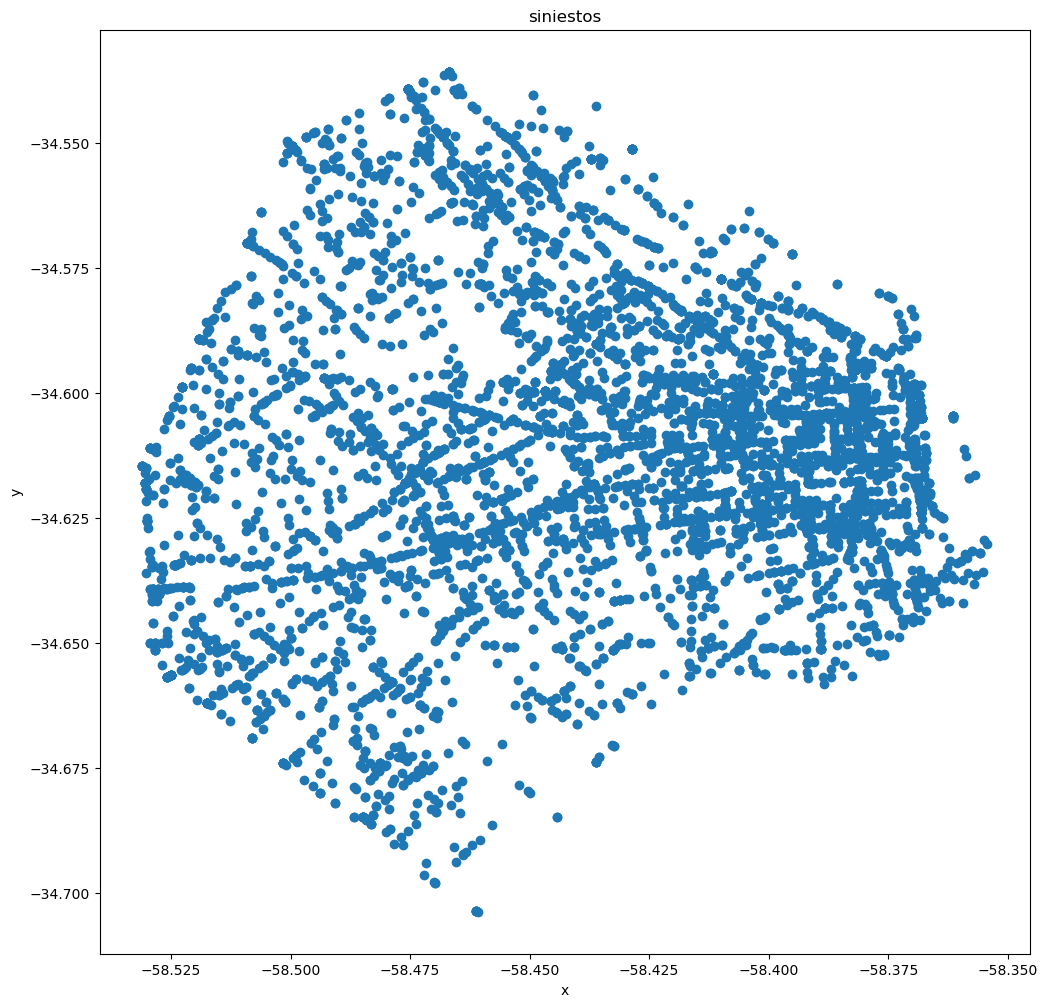

In [446]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(vacaciones['x'],vacaciones['y'])
ax.set_title('siniestos')
ax.set_xlabel('x')
ax.set_ylabel('y')

A SIMPLE VISTA (comparando con el otro scatter plot) PUEDO NOTAR QUE EN LAS VACACIONES HAY MAS CHOQUES EN LAS AVENIDAS QUE EN LAS CALLES, POR LA DISTRIBUCION QUE ESTE MAPA MUESTRA, ESTO TENDRIA QUE COMPROBARLO COMPARANDO LA PROPORCION DE CALLES Y AVENIDAS QUE REPORTAN SINIESTROS EN VACACIONES CON LA CANTIDAD QUE SE REPORTA EN LOS DEMAS MESES (siempre usando porcentajes)

VOY A ESTUDIAR LAS CALLES PELIGROSAS, LA SEXTA PREGUNTA

In [447]:
calles_peligrosas = sin_df.value_counts('calle1')
calles_peligrosas2 = sin_df.value_counts('calle2')

In [448]:
c_pel = calles_peligrosas[calles_peligrosas>5].to_frame().reset_index()
c_pel2 = calles_peligrosas2[calles_peligrosas2>5].to_frame().reset_index()

In [449]:
c_pel = c_pel.loc[~(c_pel['calle1'].str.contains('av.'))]

In [450]:
calles_peligrosas = c_pel.merge(c_pel2,right_on='calle2',left_on='calle1',how='inner')
calles_peligrosas['total'] = calles_peligrosas['0_x'] + calles_peligrosas['0_y']
calles_pel = calles_peligrosas[['calle1','total']]

In [451]:
calles_pel = calles_pel.sort_values(by='total').tail(8)
calles_pel

,calle1,total
3,"peron, juan domingo, tte. general",193
0,brasil,198
1,sarmiento,202
8,"calvo, carlos",207
11,lima,213
5,republica bolivariana de venezuela,215
4,paraguay,218
2,"mitre, bartolome",222


[Text(0, 0, 'peron, juan domingo, tte. general'),
 Text(1, 0, 'brasil'),
 Text(2, 0, 'sarmiento'),
 Text(3, 0, 'calvo, carlos'),
 Text(4, 0, 'lima'),
 Text(5, 0, 'republica bolivariana de venezuela'),
 Text(6, 0, 'paraguay'),
 Text(7, 0, 'mitre, bartolome')]

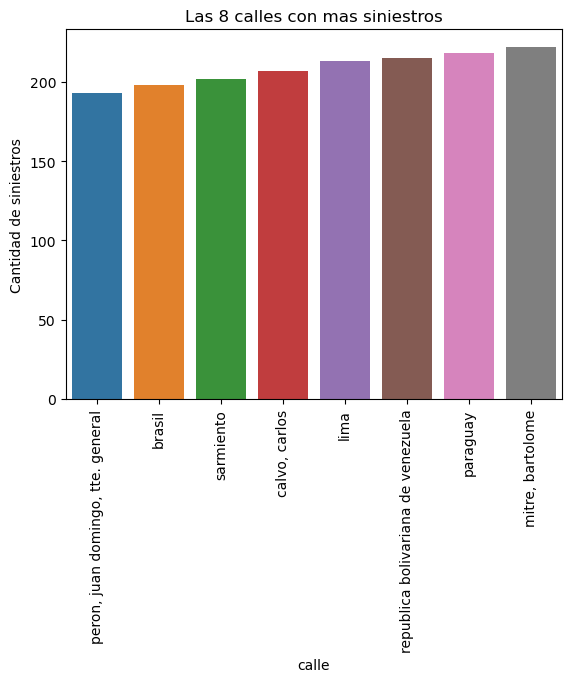

In [452]:
ax = sns.barplot(data=calles_pel, x='calle1', y='total')
ax.set_title('Las 8 calles con mas siniestros')
ax.set_xlabel('calle')
ax.set_ylabel('Cantidad de siniestros')
ax.set_xticklabels(calles_pel['calle1'],rotation=90)

Ya que las avenidas son las que mas siniestros registran, las quito del dataframe para encontrar las calles con mas siniestros en total. Esto puede servir para ver en que calles poner el foco de atencion, agregando semaforos o mejorando las condiciones de las calles. 

Podria hacer este mismo filtrado para ver que calles son las que hay mas accidentes de bicis, tambien podria ver en que calles hay mas accidentes fatales. 